# 💬 Sentiment & Theme Analysis

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

df = pd.read_csv('../data/processed/final_sentiment_reviews.csv')
df.head()
    

,review_text,rating,date,bank_name,source,source_file,app_id,translated_review,sentiment_label,sentiment_score
0,the worst app humans ever created,1,2025-06-09,BOA,Google Play,BOA_reviews_20250610_224350.csv,NaN,the worst app humans ever created,negative,0.999801
1,it's not working,3,2025-06-05,BOA,Google Play,BOA_reviews_20250610_224350.csv,NaN,it's not working,negative,0.999786
2,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play,BOA_reviews_20250610_224350.csv,NaN,"Hello, I’m facing a problem with the BOA Mobil...",negative,0.999415
3,exceptional,5,2025-06-03,BOA,Google Play,BOA_reviews_20250610_224350.csv,NaN,exceptional,positive,0.999851
4,BoA Mobile good bank,5,2025-06-02,BOA,Google Play,BOA_reviews_20250610_224350.csv,NaN,BoA Mobile good bank,positive,0.998473


### Sentiment Distribution by Bank

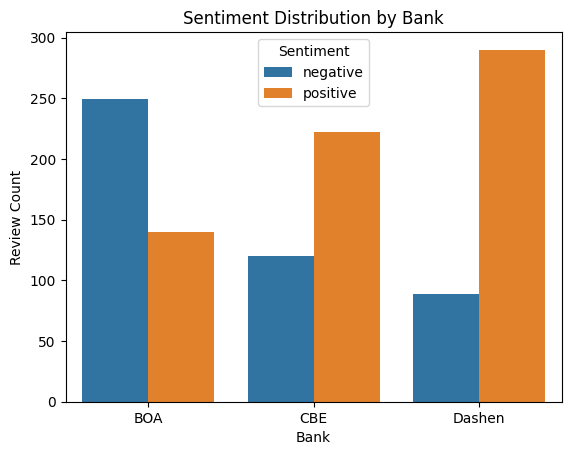

In [3]:

sns.countplot(data=df, x='bank_name', hue='sentiment_label')
plt.title("Sentiment Distribution by Bank")
plt.ylabel("Review Count")
plt.xlabel("Bank")
plt.legend(title='Sentiment')
plt.show()
    

### Word Clouds per Bank

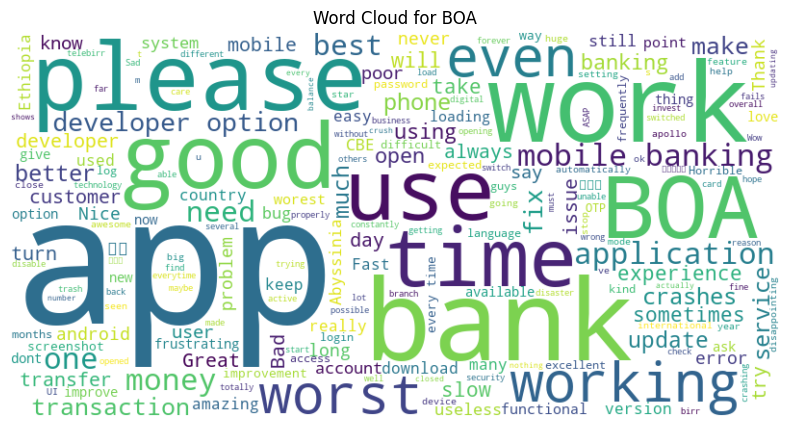

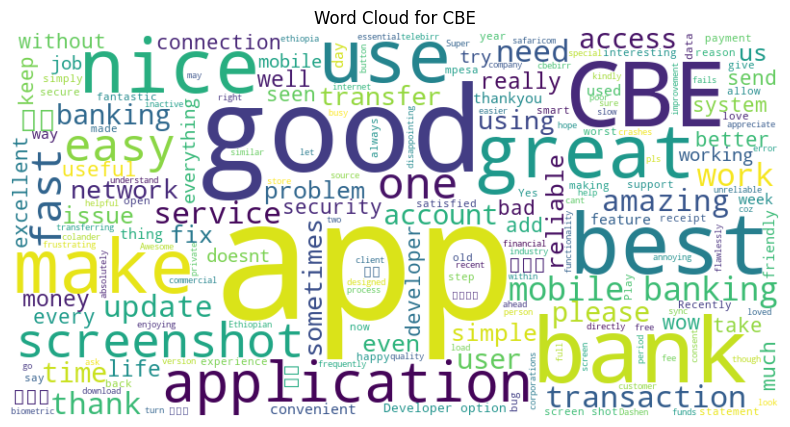

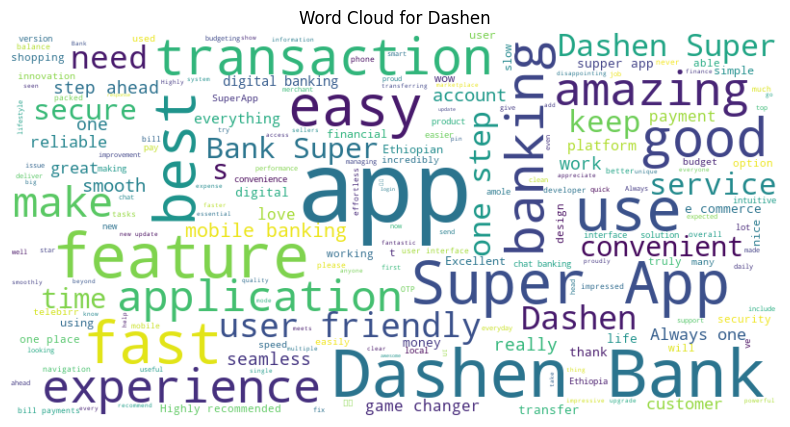

In [6]:

for bank in df['bank_name'].unique():
    text = " ".join(df[df['bank_name'] == bank]['review_text'].dropna().astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {bank}")
    plt.show()
    

### Sentiment vs. Rating

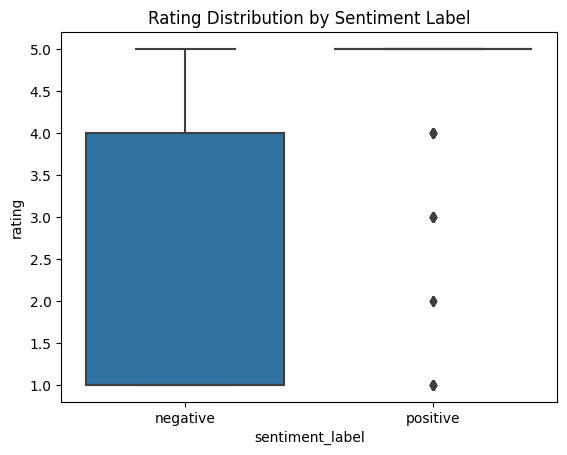

In [7]:

sns.boxplot(x='sentiment_label', y='rating', data=df)
plt.title("Rating Distribution by Sentiment Label")
plt.show()
    

### Top Keywords by TF-IDF (Basic Example Placeholder)

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['review_text'].dropna().astype(str)
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
    

['app' 'bank' 'banking' 'best' 'dashen' 'fast' 'good' 'mobile' 'super'
 'use']
